# The Second Part of the Assignment of IDS 2020-2021
In this Jupyter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

It is not needed that the group members be the same as the group members of the first part of the assignment, <font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student's matriculation number is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the datasets. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and matriculation numbers:
    
    1. Hyeon Su Gim (403364)
   
    2. Zhipeng Tan (391683)
    
    3.

## Question 1 - Data Preprocessing and Data Quality (15 points)

(a) Carry out the following preprocessing steps before starting the analysis:

Select 90% of dataset <b>dataPrepViz.csv</b> for this assignment by random sampling. Use the matriculation number of one of the group members as seed. Rename the sampled dataset to <b>dataPrepViz_sampled</b> and export it as CSV.

 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

Use this dataset <b>dataPrepViz_sampled</b> as starting point for Question 1 and Question 2. Then apply further modifications as specified in the those questions.

In [1]:
import random
import pandas as pd
import numpy as np
import math

# Import into dataframe df
df = pd.read_csv("Datasets/DataPrepViz.csv", delimiter=";")

# Set seed with student ID of Hyeon Su Gim.
random.seed(403364)

# Generate sampled_data dataframe based on random sampling of df, based on sampling size k which is the rounded up (ceiling) of the length (shape[0]) of the original dataframe, df. 
dataPrepViz_sampled = df[df.index.isin(random.sample(range(len(df)),k=math.ceil(0.9*len(df))))]
dataPrepViz_sampled.name = 'dataPrepViz_sampled'

# Export sample_data to a csv of the same name in the same directory.
dataPrepViz_sampled.to_csv("Datasets/dataPrepViz_sampled.csv", index=False)


In [2]:
dataPrepViz_sampled

,geographic_group,country,children_per_woman_total_fertility,child_mortality_0_5_year_olds_dying_per_1000_born,co2_emissions_tonnes_per_person,corruption_perception_index_cpi,life_expectancy_years,vccin_effect_dag
0,Eastern Mediterranean,Afghanistan,-10.00,70.40,0.262,11.0,61.2,0.058
1,NaN,Albania,-10.00,9.60,1.600,36.0,78.0,NaN
2,Africa,Algeria,-10.00,24.90,3.800,36.0,77.1,0.078
3,Americas,Argentina,2.31,11.50,4.640,32.0,76.5,0.013
4,Europe,Armenia,-10.00,14.40,1.650,35.0,75.3,0.139
...,...,...,...,...,...,...,...,...
134,Americas,United States,1.93,6.80,16.900,76.0,78.8,0.096
135,Americas,Uruguay,2.01,8.85,1.940,74.0,77.0,NaN
136,NaN,Uzbekistan,2.31,25.90,3.310,19.0,69.9,NaN
138,NaN,Zambia,5.04,64.60,0.271,38.0,62.0,NaN


Create new dataset <b>data1</b> by removing the feature 'geographic_group' from <b>dataPrepViz_sampled</b>. Use this <b>data1</b> dataset for Question 1.

In [3]:
# your code
data1 = dataPrepViz_sampled.drop("geographic_group", axis=1)
data1.name = 'data1' # Useful for labeling later.

(b) We want to get a first impression of the data. To achieve this, compute and show the following:

- the column names (the names of the features)
- the data type of each feature
- for categorical features: the number of classes and the value of the most frequent class
- for numerical features: the mean, standard deviation, minimum and maximum

In [136]:
# your code
print("Column Names and Datatypes:")
print(data1.dtypes)
print()
print("Categorical Features: country")
print("Count: ", len(data1.country.unique()))
print("Mode: \n", data1.country.mode())
print("The fact that all 126 countries are presented as the mode means the each class has a frequency of 1 and hence each class is the most frequent. \n")
print("Numerical Features: ")
for i in data1.columns[1:]:
    print(data1[[i]].describe())

Column Names and Datatypes:
country                                               object
children_per_woman_total_fertility                   float64
child_mortality_0_5_year_olds_dying_per_1000_born    float64
co2_emissions_tonnes_per_person                      float64
corruption_perception_index_cpi                      float64
life_expectancy_years                                float64
vccin_effect_dag                                     float64
dtype: object

Categorical Features: country
Count:  126
Mode: 
 0        Afghanistan
1            Albania
2            Algeria
3          Argentina
4            Armenia
           ...      
121    United States
122          Uruguay
123       Uzbekistan
124           Zambia
125         Zimbabwe
Length: 126, dtype: object
The fact that all 126 countries are presented as the mode means the each class has a frequency of 1 and hence each class is the most frequent. 

Numerical Features: 
       children_per_woman_total_fertility
count         

<AxesSubplot:>

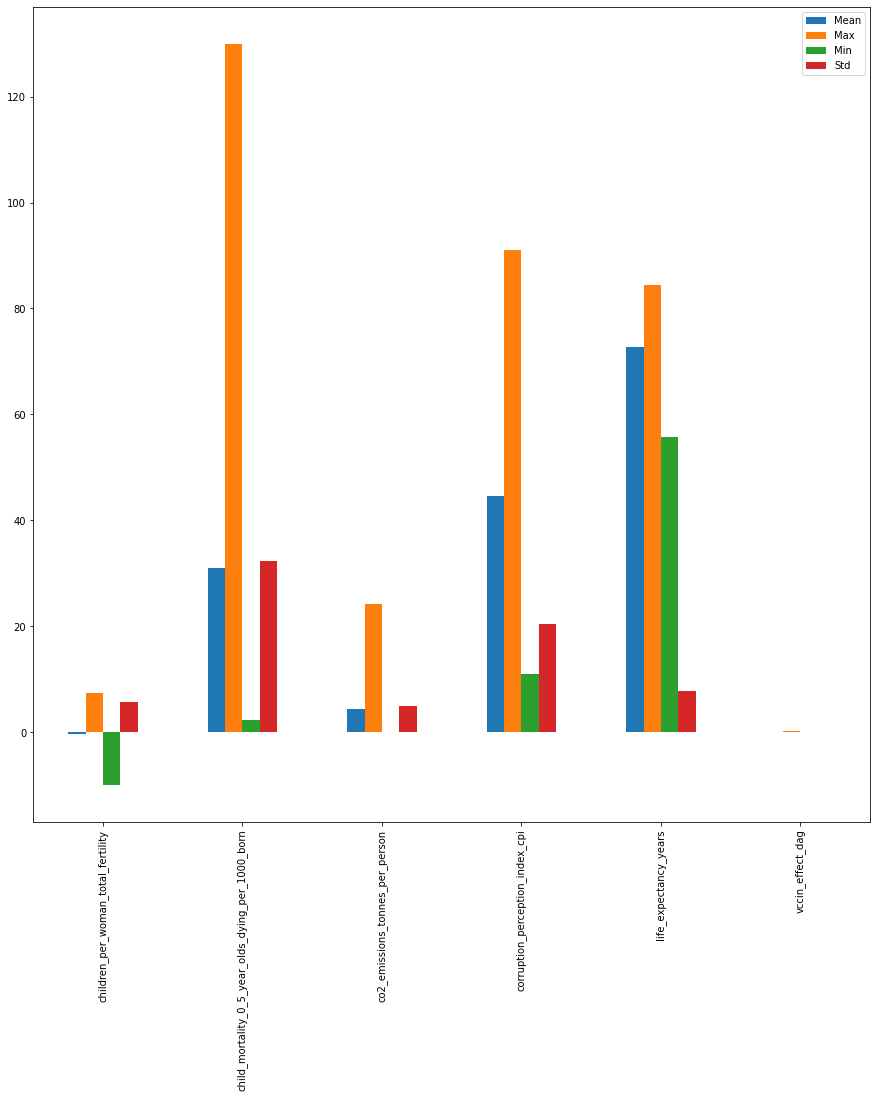

In [52]:
import matplotlib.pyplot as plt
## plot the mean, max, min, and std
MeanArray = []
MaxArray = []
MinArray = []
StdArray = []
for label in data1.columns[1:]:
    MeanArray = MeanArray + [data1[label].mean()]
    MaxArray = MaxArray + [data1[label].max()]
    MinArray = MinArray + [data1[label].min()]
    StdArray = StdArray + [data1[label].std()]

columns = data1.columns[1:]
df = pd.DataFrame({'Mean': MeanArray,
                   'Max': MaxArray,
                   'Min': MinArray,
                   'Std': StdArray }, index=columns)

df.plot.bar(figsize=[15,15],fontsize=10)


(c) For each feature, provide a histogram (with at least 10 bins each) showing the value distribution. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

Briefly explain the issues you identified.

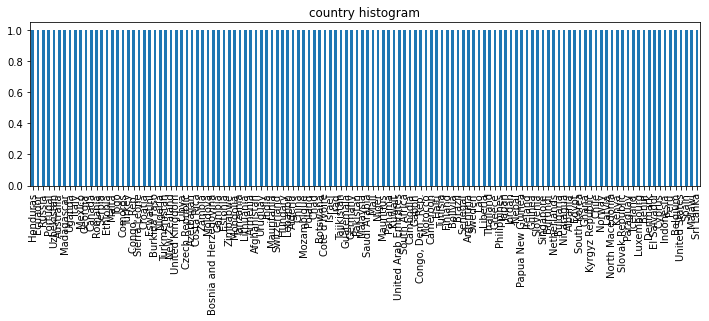

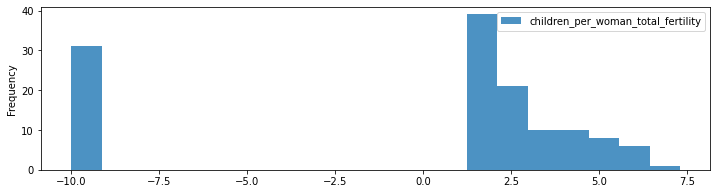

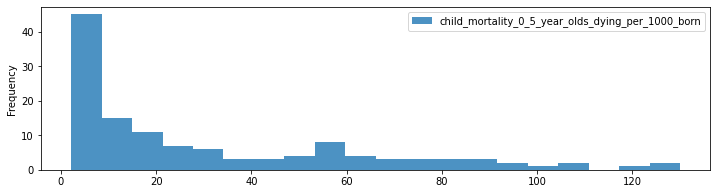

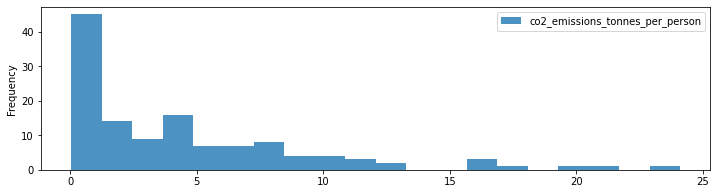

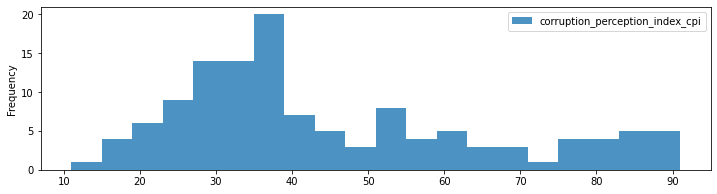

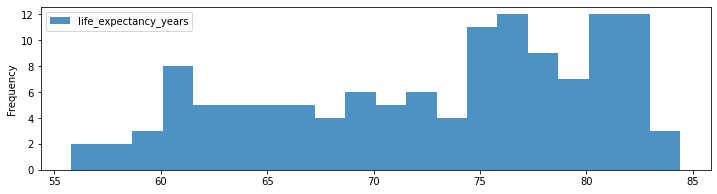

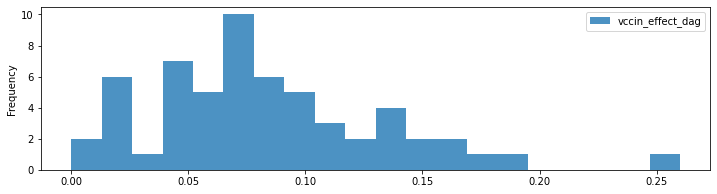

In [53]:
# your code
data1.country.value_counts().plot(kind='bar', title="country histogram", figsize=(12,3))
for col in data1.columns[1:]:
    data1[[col]].plot.hist(bins=20,alpha=0.8, figsize=(12,3))

Explanation: 
The histogram for the categorical feature country is not very useful as each country has a frequency of 1 and there are 126 of them. It is shown for completeness to answer the question.

As for children_per_woman_total_fertility, there are about 30 counts of features with values of -10, which is unreasonable. This has a high probability that the value -10 was used as a substitute for NaN.

For child_mortality_0_5_year_olds_dying_per_1000_born, there are several values which are above 100. This is not entirely implausible as the country could be undergoing a particularly violent stage for which child mortality could be more than 10% (100/1000).

For co2_emissions_tonnes_per_person, the data seems to be in order as there are no glaring exceptions. All 126 countries are accounted for.

For corruption_perception_index_cpi, there is one value missing (see part (b) for count statistics). However, the rest of the data seems to be in order.

For life_expectancy_years, data seems to be in order.

For vccin_effect_dag, there are only 58 elements, indicating more than half of the countries missing data entries. The present data, however, seems to be in order (no negative values).

(d) Substitute all implausible values as missing data (numpy.nan). Show the scatter matrix of the resulting dataset.

array([[<AxesSubplot:xlabel='children_per_woman_total_fertility', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='child_mortality_0_5_year_olds_dying_per_1000_born', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='co2_emissions_tonnes_per_person', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='corruption_perception_index_cpi', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='life_expectancy_years', ylabel='children_per_woman_total_fertility'>,
        <AxesSubplot:xlabel='vccin_effect_dag', ylabel='children_per_woman_total_fertility'>],
       [<AxesSubplot:xlabel='children_per_woman_total_fertility', ylabel='child_mortality_0_5_year_olds_dying_per_1000_born'>,
        <AxesSubplot:xlabel='child_mortality_0_5_year_olds_dying_per_1000_born', ylabel='child_mortality_0_5_year_olds_dying_per_1000_born'>,
        <AxesSubplot:xlabel='co2_emissions_tonnes_per_person', ylabel='child_mor

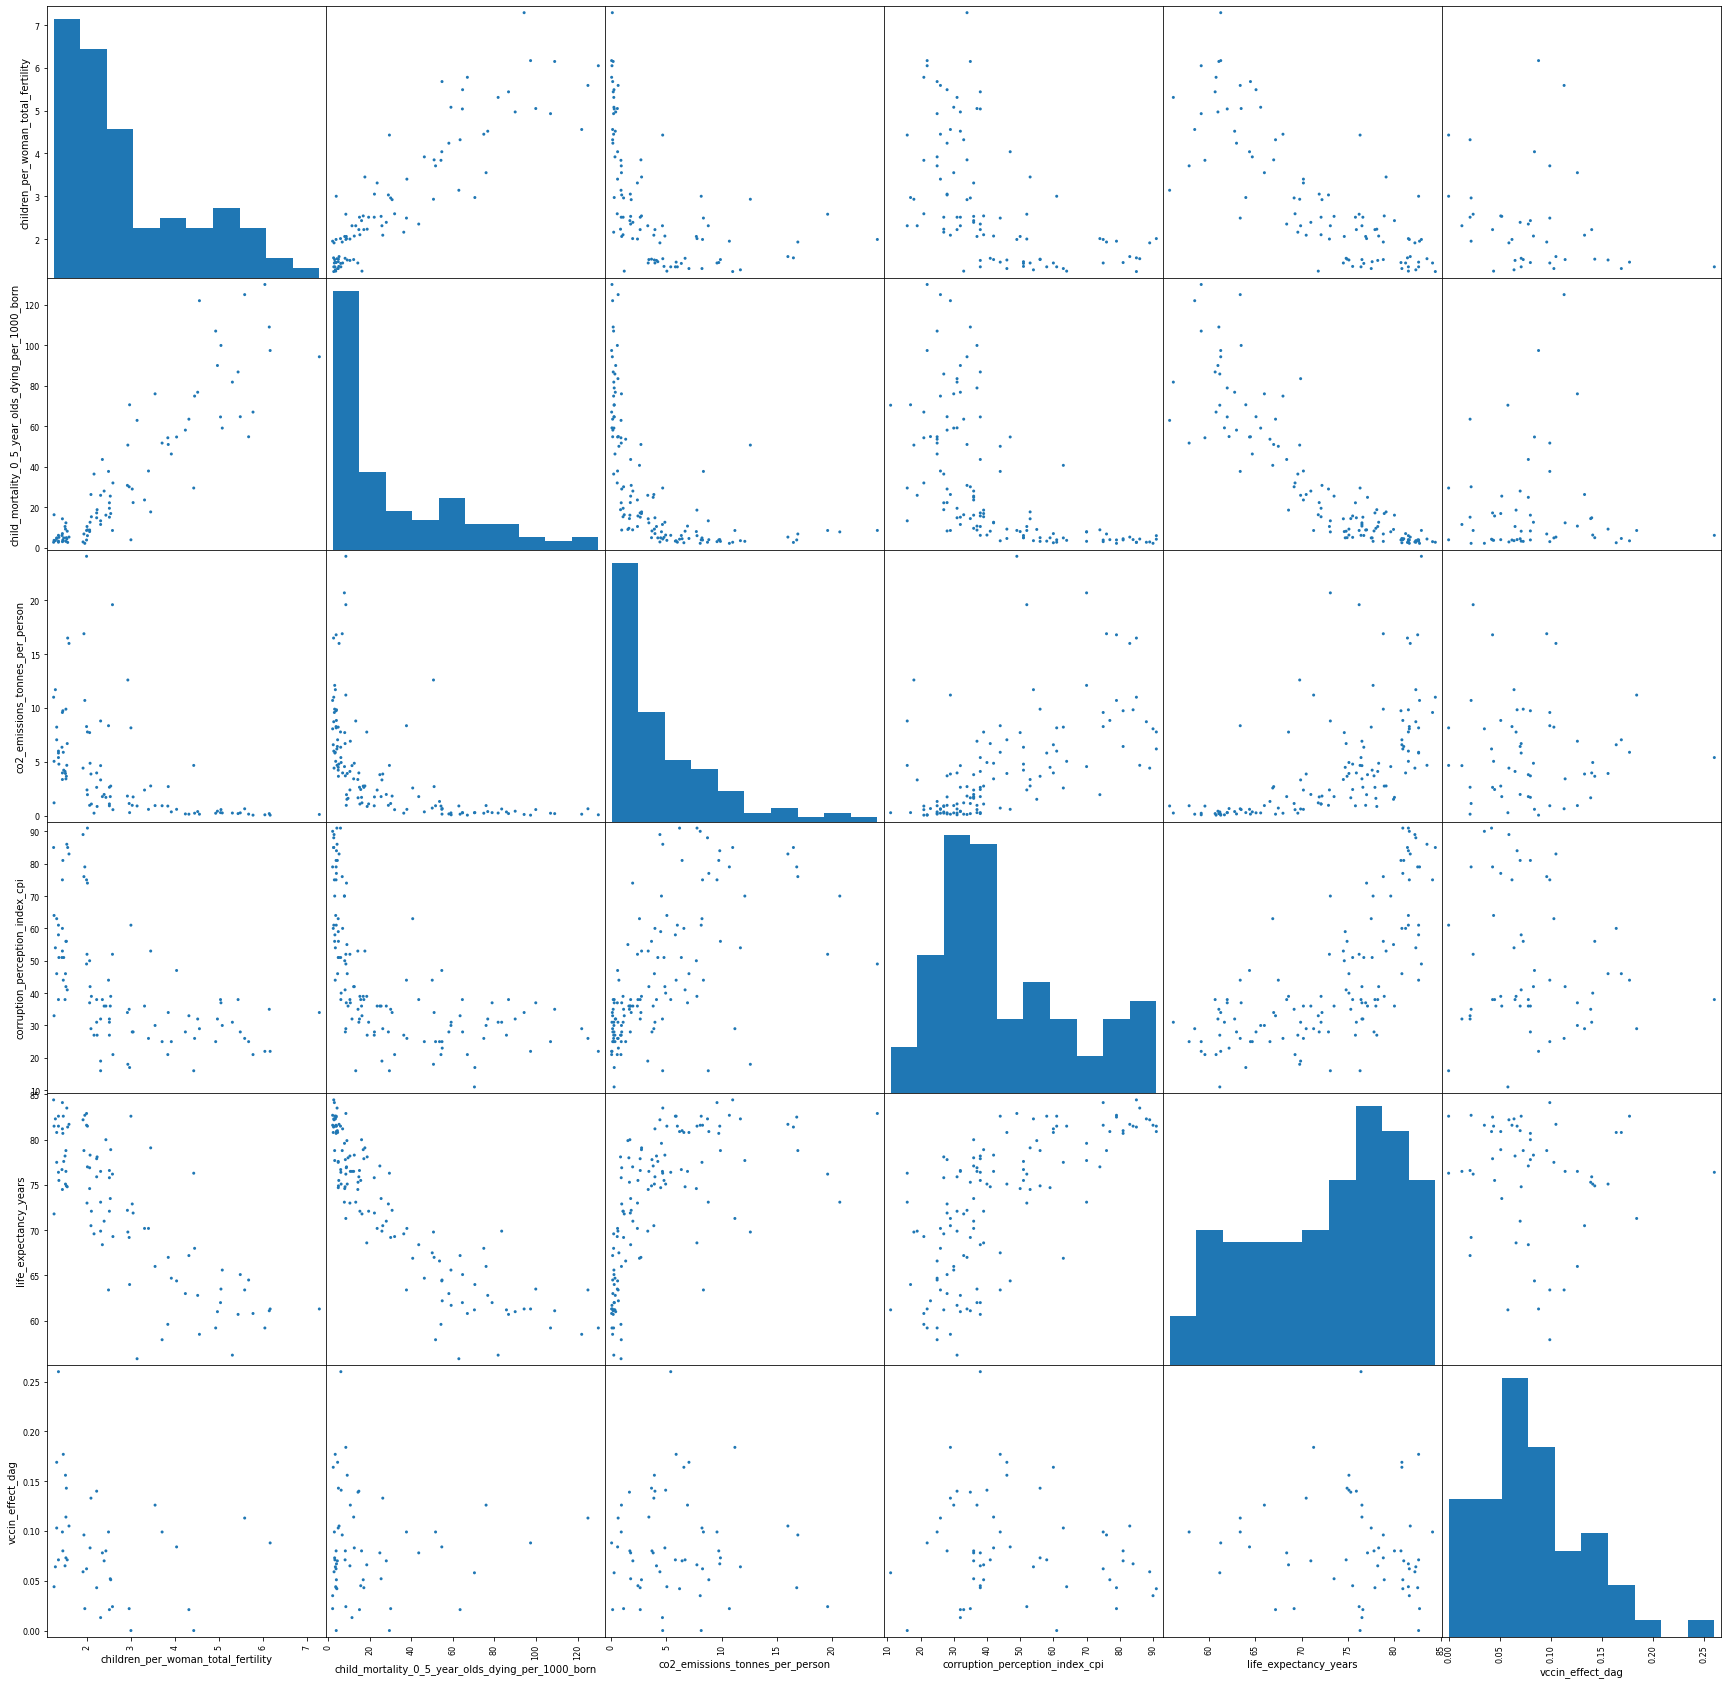

In [138]:
# your code
data1.loc[data1["children_per_woman_total_fertility"] == -10.0, "children_per_woman_total_fertility"] = np.nan
data1.isnull = np.nan
pd.plotting.scatter_matrix(data1, alpha=1.0, figsize=(30,30))

(e) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced. 

In this question, consider implausible values to be the ones identified in part (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Based on the information obtained in the previous subtasks of this question, choose a strategy for handling all missing/implausible values, such that
    - for one feature, you delete all data rows that include a missing value.
    - for one feature, you replace all missing values by the median value.
    - for one feature, you impute the values based on other, continous features using a regression classifier.
    Create a cleaned dataset with all those values handled accordingly. 
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned dataset. Also print the total number of data rows.
    
    4) Motivate and explain the choices you made in 2). Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.
 
*Hint: There might not be an obvious choice for the best strategy. In this case, sound reasoning based on correct observations is more important than the decision itself.*

In [187]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("1) Mean, SD, Min, Max, Count ignoring missing and implausible values.")
for col in data1.columns[1:]:
    print(data1[[col]].describe())
    
print("2) Strategy")
# Missing Values
print("Missing Values per row:")
data1_rowmissing = data1.copy()
data1_rowmissing["missing_value_count"] = data1.apply(lambda x: 7-x.count(), axis=1)
print(data1_rowmissing.sort_values("missing_value_count", ascending=False).head(20)[["country", "missing_value_count"]], "\n")
# Correlation Matrix
print("Correlation matrix: \n", data1.corr())

# Regression for fertility
# data1_regression = data1[["children_per_woman_total_fertility", "child_mortality_0_5_year_olds_dying_per_1000_born", "life_expectancy_years"]]
# data1_regression.dropna()
# target_feature = data1["children_per_woman_total_fertility"]
# descriptive_features = data1_regression[["child_mortality_0_5_year_olds_dying_per_1000_born", "life_expectancy_years"]]
# classifier = LogisticRegression(solver = 'liblinear')
# classifier.fit(descriptive_features, target_feature)
# target_pred = classifier.predict(data1["children_per_woman_total_fertility"])
# print(target_pred)

# Median value substitution
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values="NaN", strategy="median")
data1["corruption_perception_index_cpi"] = imputer.fit_transform(df[["corruption_perception_index_cpi"]]).ravel()


1) Mean, SD, Min, Max, Count ignoring missing and implausible values.
       children_per_woman_total_fertility
count                           95.000000
mean                             2.883895
std                              1.484305
min                              1.240000
25%                              1.555000
50%                              2.390000
75%                              3.845000
max                              7.290000
       child_mortality_0_5_year_olds_dying_per_1000_born
count                                         126.000000
mean                                           30.985714
std                                            32.312187
min                                             2.180000
25%                                             5.992500
50%                                            15.900000
75%                                            53.125000
max                                           130.000000
       co2_emissions_tonnes_per_person


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Explanation: 

For child mortality, co2 emissions and life expectancy, there are no missing values.

Strategy 1 in this particular case does not make much sense because each row corresponds to a unique country. If the country has many missing values across multiple features, then it might be warranted. To investigate this, the top 20 countries with the most missing values in the features have been listed in the code above. As we can see, out of the 6 possible attributes, at most, 2 are missing. Since this does not constitute a majority, deleting the entry is not plausible. To negate the strategy further, only 16 countries have 2 missing entries out of 126 sampled.

Between Strategy 2 and 3, several factors contribute to the decision of the choice. High correlation between one feature and another may motivate using a regression classifer. However, this may place a confirmation bias so that the replaced data placed even more of a correlation between features for a given country. On the other hand, replacing values with the median value may take away this bias. This however, has the disadvantage of introducing artificially high or low values for a given feature for the specific country. In addition, this will reduce variance.

To complicate the matter further, the choice between the strategies also depends on the particular feature on hand. For example, the fertility is highly correlated to child mortality at 0.894726. In this case, values for fertility may be substituted using a regression classifier. The logic is fairly reasonable; fertility rates are high in countries with high childhood mortality because families want higher chances for them to have surviving children past the age of 5. For the corruption index, only one country is missing a value and the correlation between any other feature hover at an absolute value of 0.6. Hence, a median value may be substituted. Finally, the vaccine confidence score shows little correlation to any other feature. Here, median values may be used. The speculation is that public confidence in a vaccine depends not on metrics listed here, but on perhaps other measures like healthcare infrastructure, availability of doctors, cultural confidence in western medicine, etc. 




## Question 2 - Data Preprocessing and Advanced Visualization (15 points)

For this question, use the <b>dataPrepViz_sampled</b> dataset you created in Q1, part (a).

(a) To create a suitable input for the following questions, modify the dataset as listed below:

    1) remove rows that contain negative values
    2) remove all rows that contain missing values

In [ ]:
# your code

(b) For this subtask remove the feature 'country' from the data. Create four parallel coordinate plots that visualize the relation between the numerical attributes for all geographic groups.

    1) For the first parallel coordinate plot, use the values unchanged.
    
    2-4) For the remaining 3 parallel coordinate plots, first normalize all numerical attributes by mapping them individually to the interval between 0 and 1, that is, apply Min-max normalization. Draw the three plots with different orderings of the features (randomized or chosen by interest).

In [ ]:
# your code

(c) For each of the questions 1-3 below:
- Indicate all of your parallel coordinate plots, which are suitable for finding an answer to the question. Explain your selection. 
- If possible, briefly answer the questions.

    1) Is there a correlation between fertility and CO2 emissions? If yes, is it positive or negative?

    2) Is there a correlation between life expectancy and vaccination confidence? If yes, is it positive or negative?

    3) Is there a correlation between CO2 emissions and perceived corruption? If yes, is it positive or negative?

Explanation: 

(d) In this subtask we prepare the data for the heat map, which we create in subtask (e). 

The heat map should visualize the vaccination confidence ('vccin_effect_dag') for different combinations of CO2 emissions ('co2_emissions_tonnes_per_person') and fertility ('children_per_woman_total_fertility'). The heatmap should have 40 columns and 40 rows. The shown vaccination confidence value should be the *median* of all values for each combination of CO2 emissions and fertility. 

Do the following steps in preparation:

    1) First, drop all columns that are not needed in this task.

    2) Discretize the CO2 emissions and fertility data into 40 bins each, using equal-width binning.

    3) Group the data by CO2 emissions and fertility, using median to aggregate the values.

In [ ]:
# your code

(e) Use the modified data to create a heat map as specified in part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) Which combination of bins results in the highest vaccination confidence? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Can you identify any pattern in the heat map, e.g. in the coloring or in the distribution of empty fields? What can be a possible reason for this?

In [ ]:
# your code

Explanation: 

## Question 3 - Frequent Item Sets and Association Rules (15 points)

(a) Carry out some preprocessing steps before starting the analysis:
 - Select 90% of the <b>store_data</b> dataset by random sampling. Use the matriculation number of one of the group members as seed.
 - After completing this preprocessing step, export your final dataset as <b>store_data_2.csv</b> dataset and use it for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [ ]:
# your code

(b) Find the most frequent itemsets with the support of more than 0.04 using the Apriori algorithm.

In [ ]:
# your code

(c) Find the most frequent itemsets with more than 1 member and a support of more than 0.04 using the Apriori algorithm.

In [ ]:
# your code

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence, and lift of the filtered rules in one table. How do you interpret the quality of the discovered rules?

In [ ]:
# your code

Explanation:

(e) Apply the FP-Growth algorithm for all the settings of b, c, and d.

In [ ]:
# your code

## Question 4 - Text Mining (15 points): 

In this question, we use <b>sms_data.csv</b>. 

In [ ]:
# your imports

a) Load the dataset and create the <b>sampled_data</b> dataset which includes 90% of the data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. Split the sampled data into training (80%) and test (20%) data preserving the distribution based on "Label".

<font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [ ]:
# your code

### Classification

In the following tasks, train each of the specified models with the training data and give for each the accuracy on the training data.

(b) Model based on the binary document-term matrix

Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal) and obtain a binary document-term matrix. Train a logistic classifier with the 'Label' as target feature.

In [ ]:
# your code

(c) Model based on doc2vec

- Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal). 
- Obtain a doc2vec embedding in order to reduce the dimension of the document vector. Explain which vector size you use and why.
- Use the doc2vec model you just trained to convert the training set to a set of document vectors.
- Train a logistic classifier with 'Label' as target feature.

In [ ]:
# your code

### Evaluation
For the following tasks, use the test data.

(d) Predict the classification with the two models on the test data. Preprocess the data if necessary.

In [ ]:
# your code

Explanation:



(e) Obtain the confusion matrices for the two models and the prediction on the test data.

In [ ]:
# your code

(f) Obtain accuracy and F1-score for the prediction of the two different models on the test data.

In [ ]:
# your code

(g) Briefly comment on the quality of the two models. Interpret the results retrieved in the evaluation part.

Explanation: 

### Language model

For the following tasks use the <b>sampled_data</b>.

(h) Create two lists, one for ham and one for spam, containing all messages.
For ham and spam separately, build a bigram language model using the initial dataset (before splitting to training and test data). Do not perform stemming nor stopword removal for this task, but apply other preprocessing steps, such as all to lowercase, no punctuation and tokenization. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [ ]:
# your code

(i) For each message groups, use the correspondent language model from (h) to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [ ]:
# your code

(j) Build a trigram model with the same data as in the previous task. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [ ]:
# your code

(k) For each message group (ham and spam), use the correspondent language model from the previous qustion to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [ ]:
# your code

(l) Compare the quality of the generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation: 

## Question 5 - Process Mining (15 points): 

### General investigation

a) Import the event log from the <b>Quarantine_Log</b> csv file. Set the case ID to 'patient', Timestamp to 'timestamp' and Activity as 'activity'. Also, set the lifecyle column to the right attribute. Furthermore, identify the case attributes and set them to case attributes. Find the correct setting, so that the resource is understood as resource (compare with the documentation). Give some basic information:

    - number of cases
    - number of variants
    - number of events
    - the trace and event attribute names
    - the number of resources
    - the earliest timestamp and the latest timestamp

In [ ]:
# your code

### Sampling the event log
(b) Create a sample of the event log (<b>log_sampled</b>) containing 80% of the traces. Export the sampled event log.

<font color='red'>Important!</font> Make sure that you submit your extracted event log with your results in Moodle.

In [ ]:
# your code

### Trace frequency
(c) Use the sampled event log and print the least frequent and the most frequent variant and the corresponding counts. Is there already some indication about the model structure (e.g. loops, parallel, etc.)?

In [ ]:
# your code

Explanation: 

### Filter event logs
(d) Create three different event logs:

1. One event log containing only the 10% of the most frequent traces (**filtered_log_variants**).
2. One event log containing only patients with private insurance (**filtered_log_insurance**).
3. One event log containing only patients having the event attribute type as 'cloud' (**filtered_log_cloud**).

In [ ]:
# your code

### Discovery and conformance checking

(e) Use the Inductive Miner to discover a process model (Process tree or Petri net) for each event log created in (d). For one of the models - you may choose - explain shortly the behaviour of the model. (e.g. loops, sequences)

In [ ]:
# your code

Explanation:

(f) Briefly summarize the differences and similarities of the models. Why do they differ/are similar?

Explanation: 


(g) Perform the token-based replay for conformance checking using your discovered model for **filtered_log_variants** and the original event log. Does your process model fit the log? Explain the result in one sentence. Calculate the trace and log fitness.

In [ ]:
# your code

Explanation: The model has a low fitness, because of the low number of traces used to create the model.

### Frequency and performance

(h) Visualize the model for the **filtered_log_variants** event log enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

In [ ]:
# your code

(i) What are frequent activities? Why may they be frequent (think about the real life process described by the log)? What are possibly problematic activities according to the performance?

Explanation: 

## Question 6 - Big Data (15 points): 

### Preparation: generating a simple log

In this question, we use the event log from the log csv file with the following modifications:
1. We flatten the lifecycles (i.e., start and complete) into a single event. Each event contains the start timestamp and complete timestamp.
2. A new column, called ServiceTime column, is included which represents the duration of the corresponding activity in the event.

We name the event log as **simple_log** in the remainder. Please follow the explanations below to prepare the **simple_log**. The preparation steps will not be graded.

In [ ]:
# We use following utility functions for the modifications (these are given):
def _distinguish_duplicate_activities(log):
    """Add flags to the duplicate activities in a trace in order to distinguish them

    Keyword arguments:
    log -- even log
    """
    trace = list()
    activity_list = list()
    count=0
    prev_caseid=""
    for row in log.itertuples():
        activity=row.Activity
        caseid=row.Patient
        if(caseid!=prev_caseid):
            count=0
            prev_caseid=caseid
            trace=[]

        if activity in trace:
            count+=1
            activity = activity + "-{}".format(count)
            
        trace.append(activity)
        activity_list.append(activity)
    log["Activity"] = activity_list
    return log

def _merge_lifecylces(log):
    """Merge lifycycles (start,complete) into a single event. 

    Keyword arguments:
    log -- even log
    """
    start_log = log.loc[log["Lifecycle"]=="start"]
    start_log = _distinguish_duplicate_activities(start_log)
    
    complete_log = log.loc[log["Lifecycle"]=="complete"]
    complete_log = _distinguish_duplicate_activities(complete_log)

    complete_log["CompleteTime"] = complete_log["ModelTime"]
    simple_log = start_log.merge(complete_log, left_on=['Patient',"Activity"], right_on=['Patient',"Activity"],suffixes=("", "_y"))
    simple_log.drop(simple_log.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
    simple_log["ServiceTime"] = simple_log["CompleteTime"] - simple_log["ModelTime"]
    return simple_log

def produce_simple_log(filepath):
    """Produce simple log where the lifecycles are merged and service time information is added

    Keyword arguments:
    filepath -- path to event log
    """
    log = pd.read_csv(filepath, sep=',')
    log.sort_values(by=["Patient","ModelTime"],inplace=True)
    simple_log = _merge_lifecylces(log)
    return simple_log

**Preparation step 1**: Replace the filepath to your own filepath to produce the **simple_log**.  

In [ ]:
import pandas as pd
#your filepath
filepath = "./Datasets/Quarantine_log.csv"
simple_log = produce_simple_log(filepath)

### Preparation: expanding the event log

In this question, we generate 100 event logs based on the <b>simple_log</b>. Each log replicates the base log (i.e., the <b>simple_log</b>). For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [ ]:
# We use following utility functions for the modifications (these are given):
import random
def _randomize_case_attribute(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    random.seed(matriculation_num)
    caseids = set(log["Patient"])
    for caseid in caseids:
        random_val = random.randint(-3,3)
        random.seed(random_val)
        log.loc[log["Patient"]==caseid,"Age"] = log.loc[log["Patient"]==caseid,"Age"]+random_val
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    import os
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    base_log = original_log.copy(deep=True)
    max_modeltime = max(base_log["ModelTime"])
    max_patientid = max(base_log["Patient"])
    for i in range(num_replication):
        generated_log = base_log
        generated_log["Patient"] += max_patientid
        generated_log["ModelTime"] += max_modeltime
        random.seed(None)
        randomized_log = _randomize_case_attribute(generated_log,random.randint(0,mat_num))
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))
        base_log = randomized_log

**Preparation step 2**: Generate 100 replicated logs in your local disk (./generated-logs/generated-log-0.tsv, ./generated-logs/generated-log-1.tsv, ..., ./generated-logs/generated-log-99.tsv). Do not forget to replace the SUM_MAT_NUM to yours.

In [ ]:
#your group's sum
SUM_MAT_NUM = 154031 
base_log = simple_log[["Patient", "ModelTime","Activity","Age","ServiceTime"]] # this will be removed
NUM_REPITITION=1
generate_log(base_log,NUM_REPITITION,SUM_MAT_NUM)

### Basic Hadoop

(a) Now, it's time to work with the Hadoop system. The goal of this task is to merge 100 event logs at your disk in the Hadoop system. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Alessandro Berti", "Bernardo Silva", "Chiao Li", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the files to the running Hadoop system (at /input/(identifier)-generated-logs/). 
    3) Merge the file and copy the result back to the Hadoop system (at /input/(identifier)-final-log.tsv).
    4) Using the Hadoop command, print out the merged file in the command line (the screenshot may contain 10 rows).

In [ ]:
#your code
from IPython.display import Image
Image(filename='your_path_to_screenshot_of_a1') 

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a2') 

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a3') 

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a4') 

### Process Discovery

(b) Discover a process model from the merged file using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Jupyter notebook code that prints the directly-follows relations and discover process models based on the directly-follows relations (you are free to use any discovery algorithms)

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

In [1]:
# your code for (b)-4

### Performance Analysis

(c) Calculate the total service time for each case using MapReduce algorithms. Explain how you calculate the total service time for each case with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Result: total service times for cases (as text file)
    
Important! Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), 3), and 4) should be submitted as outputs.

(d) Visualize 1000 cases with the longest total service time using any chart.

In [ ]:
# your code